<h2>INITIAL CONTRIBUTION</h2></br>
<h4>By Edward Okeyo Obala</h4>


<p>Importing all the necessary libraries that I will use through out the notebook, however, Incase of any new development or need for a library that I will use temporarily I will import it into the cell I am using it in</p></br></br><p>Major Libraries and Packages I used</p>
    <li>
    <ul>Pandas-read the set</ul>
    <ul>Numpy-for working with the dataset as an array</ul>
    <ul>Matplot.lib-for the visualisation</ul>
    <ul>Seaborn-for enhanced visualisations</ul>
    </li>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


<p>Reading through the file using pandas and getting the shape</p>


In [2]:
datafile=pd.read_csv("dataset.csv")
# Checking its shape to know the columns and rows
datafile.shape

(1460, 81)

In [3]:
# To present the datafile
datafile

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


<h2>Cleaning Process</h2></br>
<p>Cleaning using fillna to fill up empty cells with mean/median/interpolation or select values. I am avoiding deleting cells and columns using dropna() to make sure the data is usable in determining what the most heavily weighted variables are e.g an assumption made is not many homes have swimming pools but a house with a pool is considerably priced higher than that without one so deleting this information might lead to misinformation so I would rather fill it with valid categorical data</p>

In [4]:
# To clean the data I plan on interpolating and using median where I can if its using qualitative data 
# If not I will either fill out the empty cells with select values 

# Replacing Quantitative values in rows with the mean and Interpolation
# e.g Lot Fontage, 

#1. Because NA means no pool in PoolQC, fence in Fence, Misc in MiscFeature I will replace NA with none
# Since there are multiple columns with this I will fill them with a loop

columns_to_fill=["Alley","BsmtQual","BsmtCond",
                 "BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu","GarageType",
                 "GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]
clean_datafile=datafile
for i in columns_to_fill:
    clean_datafile[i]=clean_datafile[i].fillna("Not_there")

# This is after the empty spaces for the following cells have been filled with "Not_there"
# I also did this to the specific columns rather than the whole data set to avoid mixing up 
# qualitative and quantitative data
# An alternate way of doing this would be to check for each column in the row if the values are qualitative with 
# an instance checker to check the data type pf the set. This being a simple loop it will not be tedious o{n} 
# I would then check for NA values and fill them with "Not_There"


#2.Looping through Qualitative rows to check if the values are numerical and then replacing NA columns 
# with the average of each column

# Length of column
x=[datafile.shape[1]]

# Looping thorugh the whole width(columns) of the set
# with an isinstance checker I will look for data type that is a integer or float that way I will know which 
# rows have numerical values without going throught the whole array  
for i in range (0,x[0]):
    if isinstance(clean_datafile.iloc[0,i],int)==True or isinstance(clean_datafile.iloc[0,i],float)==True:
        clean_datafile.iloc[:,i]=clean_datafile.iloc[:,i].fillna(clean_datafile.iloc[:,i].mean())
    else:
        continue

#3. Filling the rest of the NA cells with "value_absent" assuming they are not integers or floats
# and that in the first step i had already filles the rest of the values with valid categories
clean_datafile=clean_datafile.fillna("value_absent")

<h2>Exploratory Data Analysis</h2></br>
<p>For this I decided to categorise the data into two groups which was the </p>
<li> 
    <u1>Continous/Numerical data </u1>
    <u1>Categorical data</u1>
    </li>

</br><p>For the contnous data I ended up using a scatter plot and a simple regression line, for the sake of the discrete data, to determine what sort of relationship the features have with the Sale price. For the categorical data I used a box plot in seaborn this is because it can show: 
    <li>
        <u1>The number of features that fall within that category,</u1>
        <u1>The minimum and maximum Sale price point that is represented in that category,</u1>
    </li></p>
    
<p><strong>Note</strong> Some numerical values almost fall in the categories segment as they are repetitive such sa number of rooms and such which move from different ranges and vice cersa so I made some slight changes to things  such as year and MSSubclass which I pushed into categorical data as I consider them ordinal data</p></br>
<p>I also classified the discrete data as continous as classifying them as categorical would throw out a lot of information. Link to a resource I used to inform my decision</p>
</br>link: https://stats.stackexchange.com/questions/261396/integer-data-categorical-or-continuous#:~:text=Integers%20are%20discrete%2C%20not%20continuous,could%20lose%20quite%20a%20bit. 

In [5]:
# displaying the cleaned dataset
clean_datafile

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Not_there,Reg,Lvl,AllPub,...,0,Not_there,Not_there,Not_there,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Not_there,Reg,Lvl,AllPub,...,0,Not_there,Not_there,Not_there,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Not_there,IR1,Lvl,AllPub,...,0,Not_there,Not_there,Not_there,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Not_there,IR1,Lvl,AllPub,...,0,Not_there,Not_there,Not_there,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Not_there,IR1,Lvl,AllPub,...,0,Not_there,Not_there,Not_there,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Not_there,Reg,Lvl,AllPub,...,0,Not_there,Not_there,Not_there,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Not_there,Reg,Lvl,AllPub,...,0,Not_there,MnPrv,Not_there,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Not_there,Reg,Lvl,AllPub,...,0,Not_there,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Not_there,Reg,Lvl,AllPub,...,0,Not_there,Not_there,Not_there,0,4,2010,WD,Normal,142125


***Analysis of Non-Categorical data (Numerically Represented)***

In [6]:
# Checking the columns in the dataset
clean_datafile.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
# All non-categorical data, I used in the upper cell to determine all the numerical values and from it 
# I formed the list of the columns with numerical data.
# From then I went through the list removing values that were represented numerically but were categorical data
# Such as Years and MSSubclass
# The product is purely non-categorical data
# Some of the data might not seem continous such as the number of rooms but I did not consider them categorical 
# as they are disrete values but do not represent groups and decided to leave them behind
features=['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 
        'TotalBsmtSF','1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars', 
       'GarageArea','WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal']

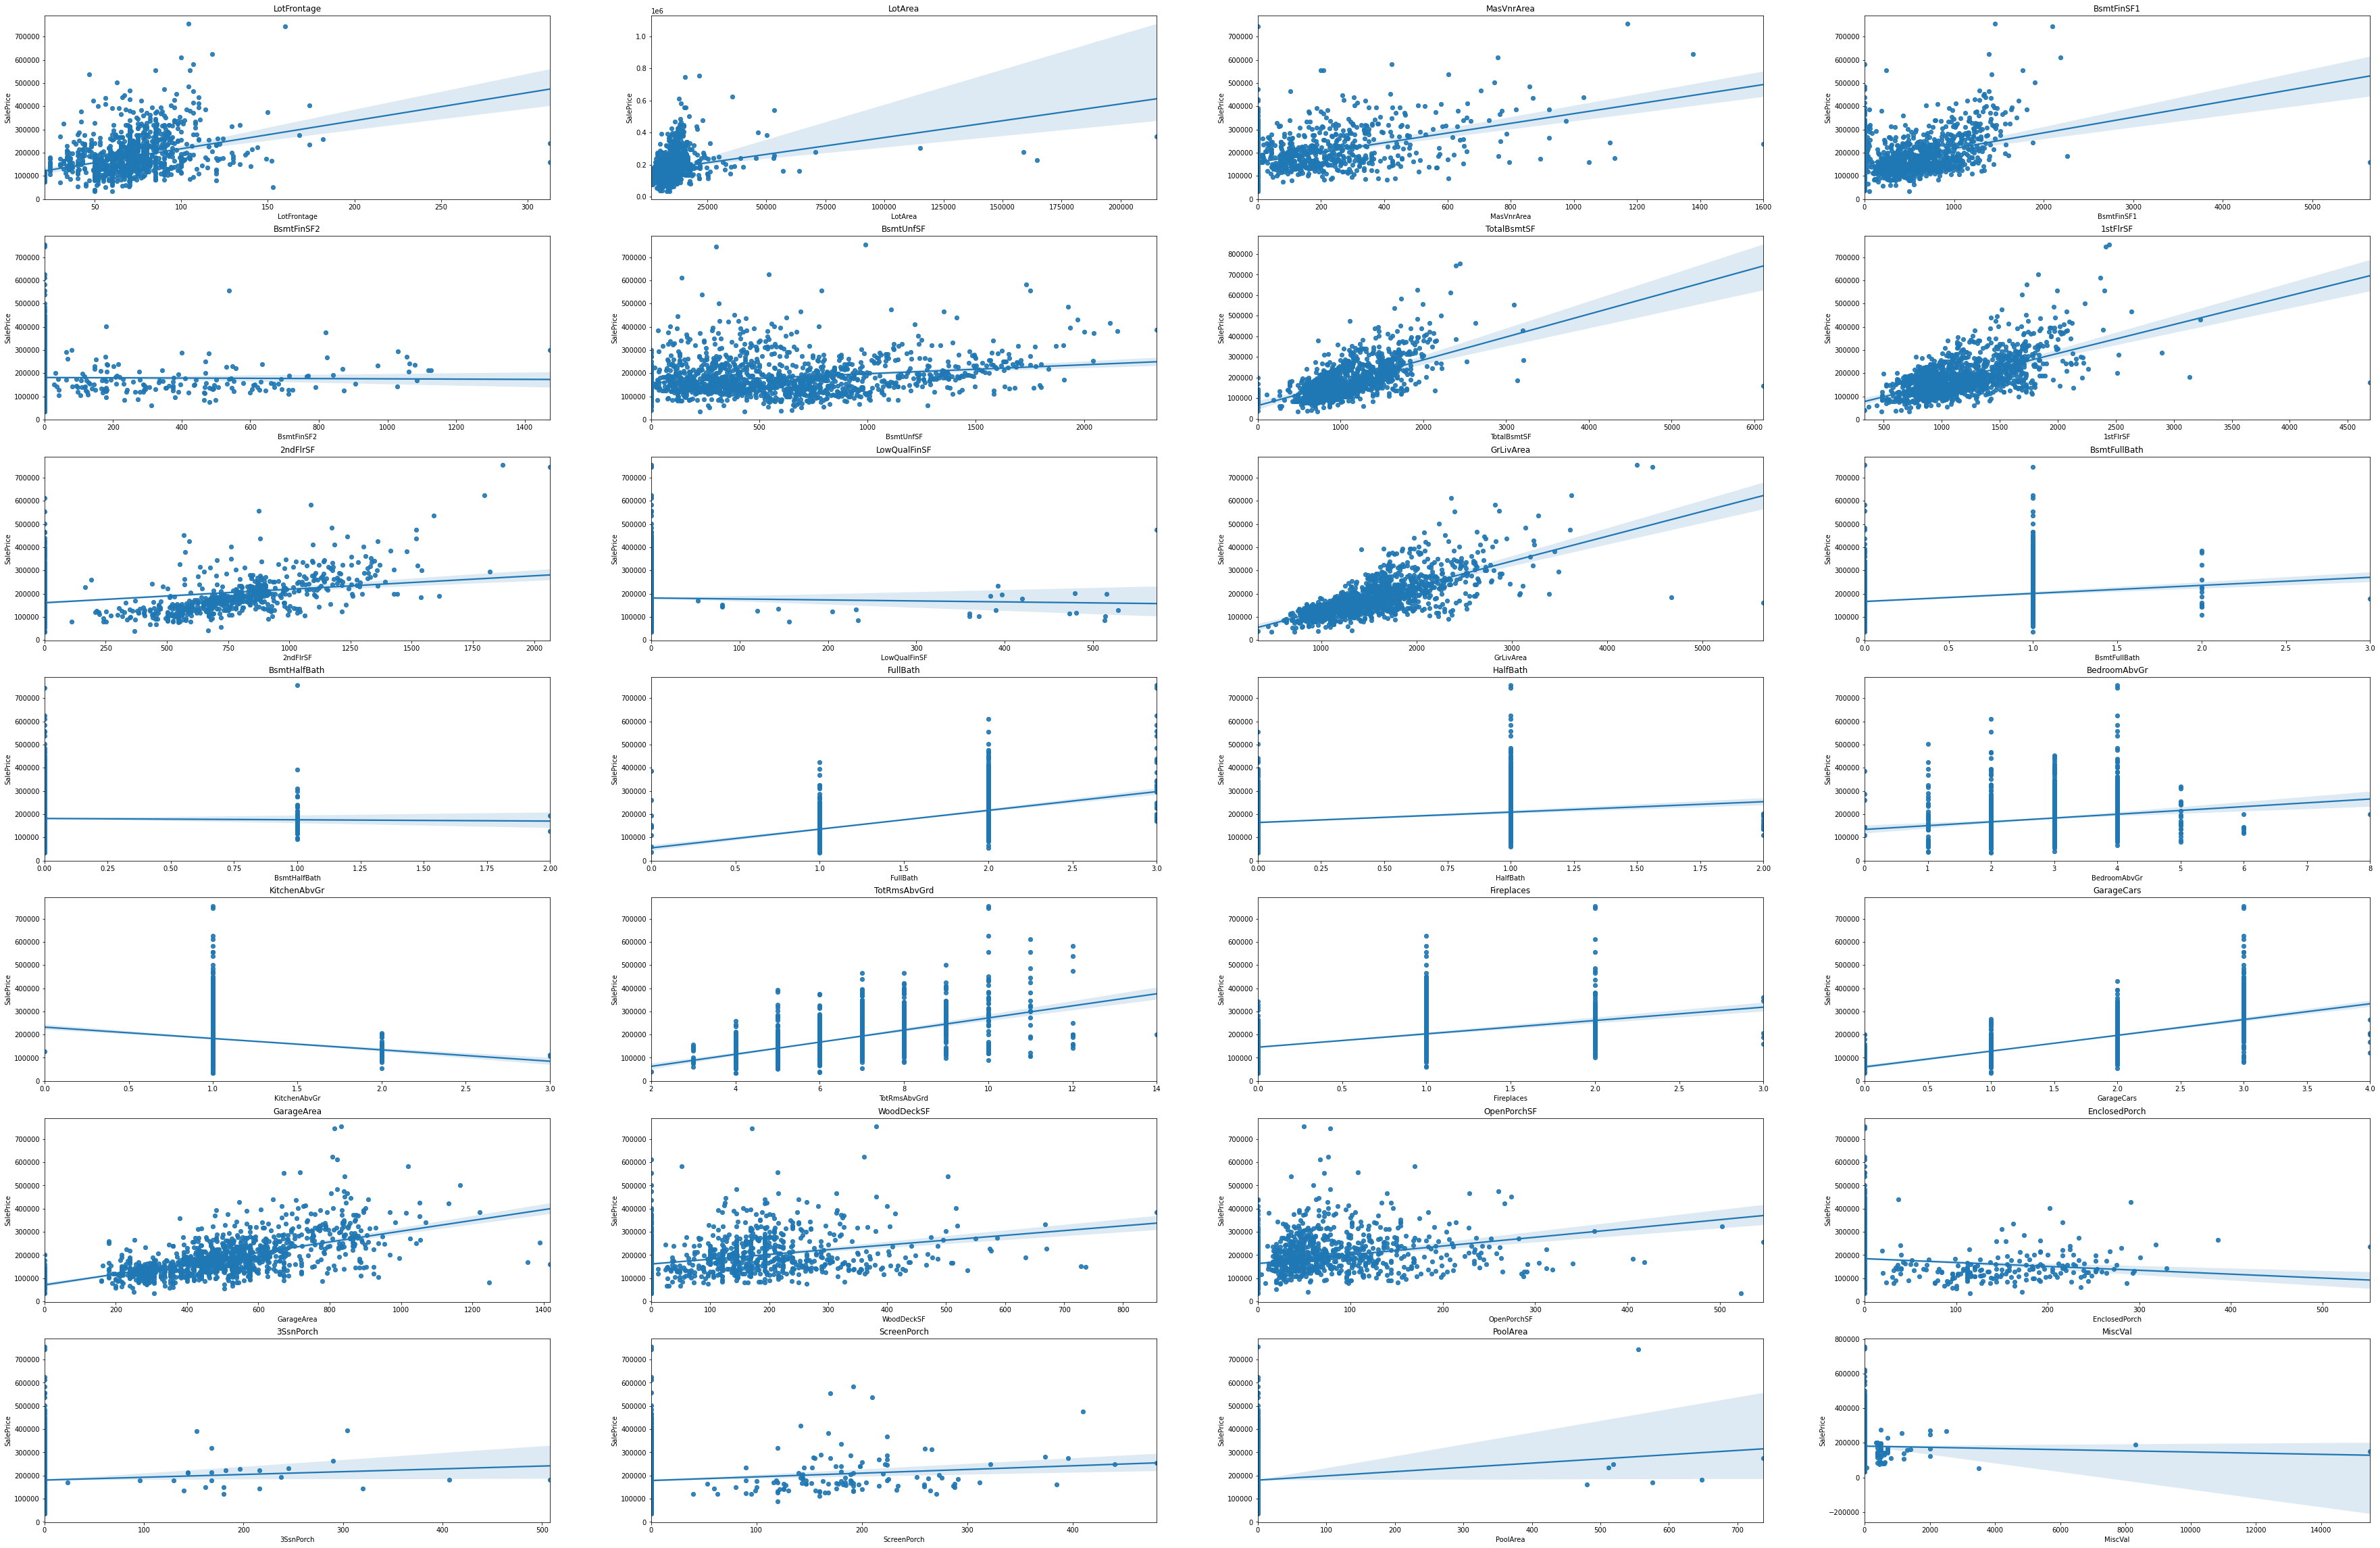

In [8]:
# I created a sub variable to use in to show the expected objects in the subset plot
sub=0
for i in features:
    if sub<32:
        sub+=1
        #Creating a subplot to represent multiple plots 
        plt.subplot(8,4,sub)
        # Plottinf a scatter plot with the various values in each row
        plt.scatter(clean_datafile[i],clean_datafile["SalePrice"] ,alpha=0.5)
        # labels
        plt.xlabel(i)
        plt.ylabel("Price of sale")
        plt.title(i)
        # Adding a line of best fit without using a learning model
        plt.subplots_adjust(left=None, bottom=5, right=2, top=6, wspace=None, hspace=None)
        # Adgusting the spacing of the subplots
        ax = sns.regplot(x=clean_datafile[i], y=clean_datafile["SalePrice"], data=clean_datafile)
        

fig = plt.gcf()
fig.set_size_inches(25.5, 35.5)



        
# Zoom in with double left click 

<h3>Conclusion</h3>

</br><p> The Non-categorical data consisted of 28 different variables considered in property pricing. </p>
    
</br>
<p>There are four types of data represented in the plots above</p><li>
    <ul>Data features with positive relationsships</ul>
    <ul>Data features with negative relationsships</ul>
    <ul>Data features with neutral relationsships</ul>
    <ul>Limited discrete data</ul>
</li>
</br>
<h4>Data with Positive Relationships</h4>
<p>There were 16 data points with positive relationships with the Sale price, this is inclusive of discrete data points.
This were features and data points that their value/size increased with the increase in sale price.such as GrLivArea (Ground LIving Area) which had the strongest positive relationship with the sale price </p>

</br>
<h4>Data with Negative Relationships</h4>
<p>There were 3 data points with negative relationships with the Sale price, This were features and data points that their value/size decreased with the increase in sale price. An example is the Enclosed Porch area which decreased in size despite the increase in the sale price </p>

</br>
<h4>Data with Neutral Relationships</h4>
<p>There were 8 data points with neutral relationships with the Sale price inclusive of discrete datapoints, This were features and data points that their value/size were not affected/slightly affected with the increase in sale price. An example is the Miscallenous features' value which stayed neutral to the increase in the sale price</p>

</br>
</br>

<h3>Analysis of Categorized data</h3>

50


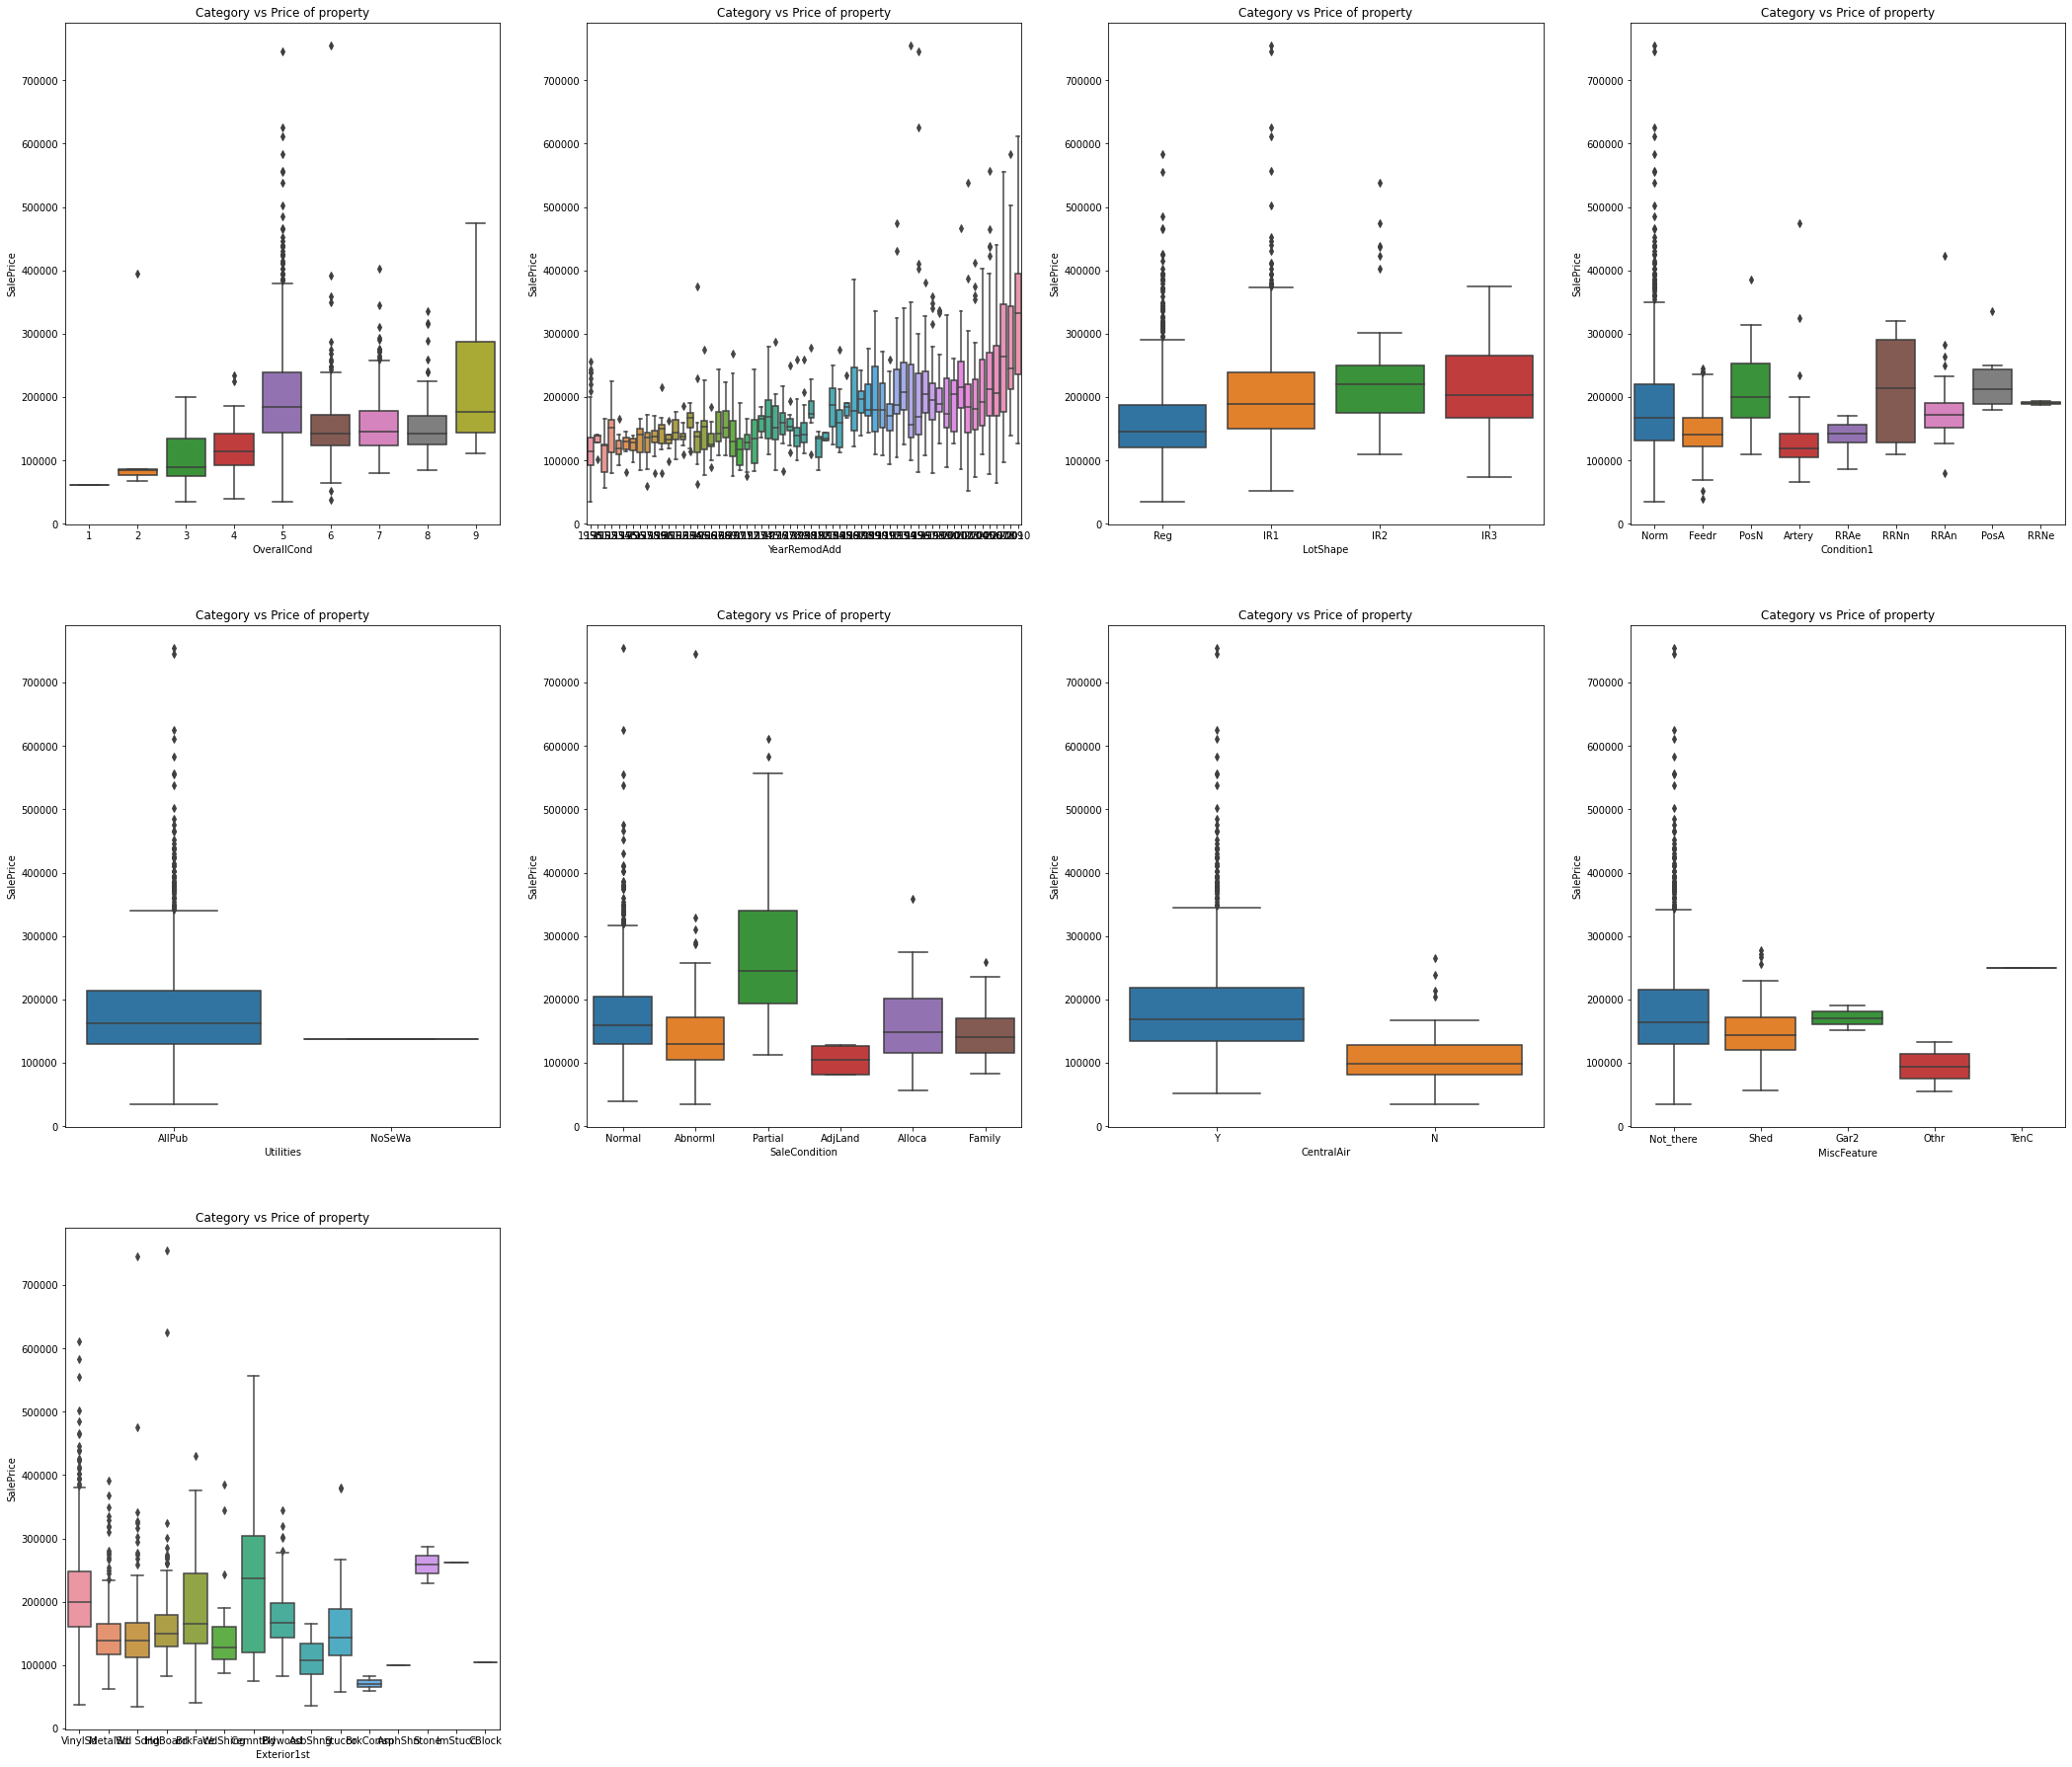

In [9]:
# All the features in the dataset that are going to be sifted through by looping through it with the 
# numerical values and removing them from the categorical set 
cat_features=['MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']

# The loop that is going to go through the list above and remove all numerical coluumns except for the yaars 
# and a few other columns that are classified as categorical
for i in features:
    if str(i) in cat_features:
        cat_features.remove(i)
        
print(len(cat_features))

# Getting random values
# I am using the random value to display 10 random visualizations in the list as i realised my computer's 
# perfrommance reduced significantly when I tried to represent all the values in the box plots 
# So i thought doing so might spare any system someone was using inclusive of any other operations they 
# might want to do
import random
m=1
rand=0
while (m<10):
    n=random.randint(1,49)
    m+=1
    #The subplot specifications
    plt.subplot(3,4,m-1)
#   I used a seaborn boxplot for the folloing reasons
#   To show The number of features that fall within that category, 
#   To show the minimum and maximum Sale price point that is represented in that category,
    sns.boxplot(x=clean_datafile[cat_features[n]], y="SalePrice", data=clean_datafile)
    plt.xlabel(cat_features[n])
    plt.ylabel("SalePrice")
    plt.title("Category vs Price of property")
    plt.subplots_adjust(left=None, bottom=5, right=2, top=8, wspace=None, hspace=None)
    
    
fig = plt.gcf()
fig.set_size_inches(15.0, 8.0)



# Zoom in with double left click

<h3>Conclusion</h3>
<p>The categorical data was represented and from it you can see catagories that were dominant such as the (RRNn) Within 200' of North-South Railroad, of (Condition1) Proximity to various conditions, having a long height across different price points in the box plot others were negligable such as (Nosewa)Electricity and Gas Only, of (utilities)Type of utilities available, and which was narrowly represented in the box plot in terms of height</p>

<h2>Learning the Coeffecients (Weights applied to each value)</h2>

<p> I am looking to use two methods to identify the association strength between the values and the result for one I will use Pearsons correlation for the continous data usable and Continuous Eta squared for the categorical data
</p>

In [10]:
# features added to both the categorical and cotnoinous features
# I added the SalePrice Column to both initial lists so I can deduce the correlation.associiative stregth with it  
new_features=['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 
        'TotalBsmtSF','1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars', 
       'GarageArea','WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal','SalePrice']

cat_features1=['MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition','SalePrice']

In [11]:
# Created new datasets using the lists above
# features with contonous values
continous_features=clean_datafile[new_features]

# features withcategoriccal values
categorical_features=clean_datafile[cat_features1]


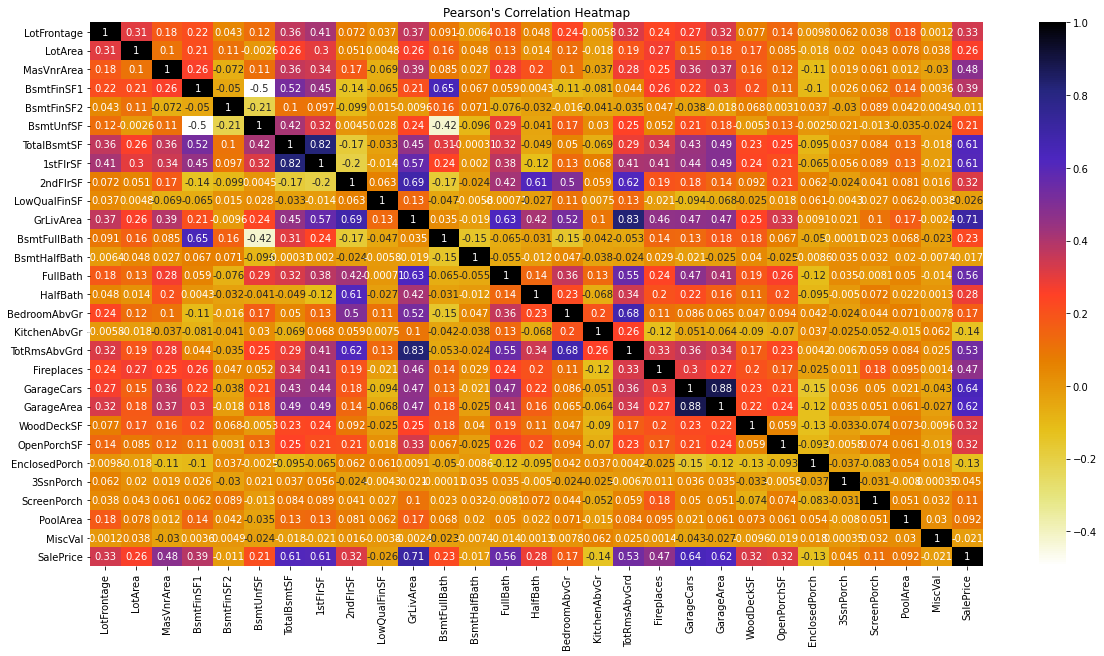

In [12]:
# Performing a correlation for the continous variable then showing it on a seaborn heatmap 
# The heatmap reflects the level of correlation using the Pearson's correlation (default Numpy method) with each factor in the tables,
# From there I will check the highest correlation value in the dataset to find the most prevalent contnous column
plt.figure(figsize=(20,10))
cor=continous_features.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.title("Pearson's Correlation Heatmap")
plt.show()


# Zoom in with double left click

<h4>Conclusion of Pearsons Correlation test on all the continous variable</h4></br>
<p>The variable with the highest correlation was the GrLivArea which represents the above grade (ground) living area square feet with a correlation of <strong>+0.71/+1</strong> </p>

<h4>Reasons I did not use encoded data on the pearsons correlation</h4></br>
<p>I know that for a dichotomous categorical variable and a continuous variable you can calculate a Pearson correlation if the categorical variable has a 0/1-coding for the categories. This correlation is then also known as a point-biserial correlation coefficient.
But when you have more than two categories which I did in this case for the categorical variable the Pearson correlation is not appropriate anymore. You should then use eta-squared, or eta, as an effect-size measure for the relationship of a categorical variable and a continuous variable.</p>

/home/edward/.local/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.10, the latest is 0.3.11.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


Text(0.5, 1.0, 'SalePrice vs Categorical features Eta Squared Associative strength test Bar graph')

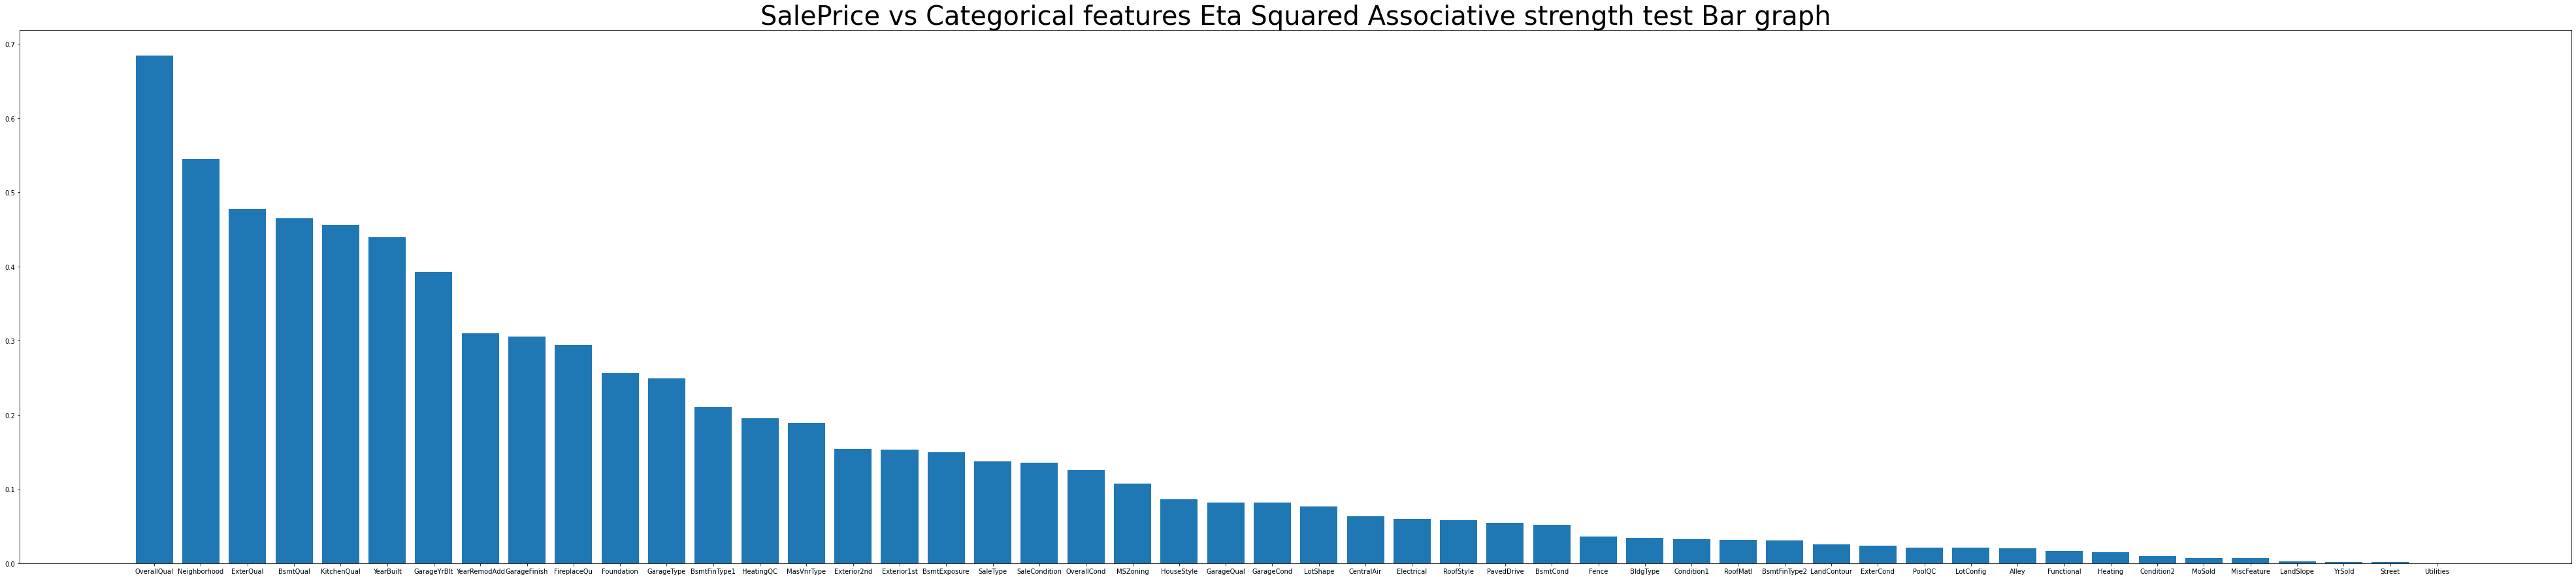

In [13]:
# performing an Eta squared operation on the Categorical data
# I will represent this on the data
# importing pingouin to use Eta squared
# download pingouin using pip install in python
# pip install pingouin/pip3 install pingouin
import pingouin as pg


# to get rid of multi indexing
categorical_features.columns = categorical_features.columns.get_level_values(0)

# disctionary to have all the categorical features in line with its associative strength
correlation_categories={}

# Eta squared operation
for i in cat_features:
    aov=pg.anova(dv="SalePrice", between=i, data=categorical_features, detailed=True)
    correlation_categories[i]=aov.iloc[0,6]

# Sortinng the dictionary in descending order to represent the data that way too
import operator
correlation_categories=dict( sorted(correlation_categories.items(), key=operator.itemgetter(1),reverse=True))


# To plot each value against the sale price
plt.figure(figsize=(70,15))
plt.bar(correlation_categories.keys(), correlation_categories.values())
plt.title("SalePrice vs Categorical features Eta Squared Associative strength test Bar graph", fontsize=40)



# Zoom in with double left click

<h4>Conclusion of Eta Squared test on all the continous variable</h4></br>

<p>I used Eta squared because Eta squared is intended for use with categorical independent variables and continuous DVs.</p>
<strong>NOTE: Eta Squared Performance Range</strong></br>
<li>
    <ul>Large - 1.00>=0.14</ul>
    <ul>Medium - 0.14>0.06</ul>
    <ul>Small - 0.06>0.01</ul>
    <ul>Negligable - 0.01>0.00</ul>
</li>
<p>The variable with the highest correlation was the OverallQual which represents the Rates the overall material and finish of the house with an assocation strength of <strong>+0.68/+1</strong> </p>

<strong>Reference :</strong>(nominal vs scale - Part 3c: Effect size (eta squared), 2021)

<h2>Conclusion</h2>
</br>
<p>From this I have found that the Ground living space in Area (GrLivArea) had the closest correlation amongst the <strong>continous data</strong> and best describes the Sale price column as it rises almost proportionally to the sales price.</p></br><p>Amongst the <strong>categorical data</strong> I found the Overall material and finish of the house(OverrallQual) had the strongest associative strength and also increased almost proportionally to the Sale price</p></br><p>I could not compare the two because of the complete difference in terms of their performance/correlation/association ranges</p>

<h4>I however concluded that the GRLivArea best represents the Sale Field out of alll the columns as its continous nature gave it an edge over the categorical nature of OverallQual in terms of its growth</h4>

<h2>References</h2>
</br></br>
Peterstatistics.com. 2021. nominal vs scale - Part 3c: Effect size (eta squared). [online] Available at: <https://peterstatistics.com/CrashCourse/3-TwoVarUnpair/NomScale/NomScale3c.html> [Accessed 7 April 2021].
</br>
</br>
Shieh, G. Confidence intervals and sample size calculations for the weighted eta-squared effect sizes in one-way heteroscedastic ANOVA. Behav Res 45, 25–37 (2013). https://doi.org/10.3758/s13428-012-0228-7
</br>
2021. [online] Available at: <https://www.researchgate.net/figure/ETA-squared-values-weights-for-the-dimensions-of-the-composite-score_tbl1_308727387> [Accessed 7 April 2021].
</br>

Eta squared and partial eta squared as measures of effect size in educational research. [online] Available at: <https://www.sciencedirect.com/science/article/abs/pii/S1747938X11000029> [Accessed 7 April 2021].
</br>
correlate?, i., Reddy, N. and nayak, A., 2021. is it better to correlate and encode or encode and correlate?. [online] Data Science Stack Exchange. Available at: <https://datascience.stackexchange.com/questions/81618/is-it-better-to-correlate-and-encode-or-encode-and-correlate> [Accessed 7 April 2021].

<h1>2nd Contribution</h1>

<h3>Feature Selection Process</h3></br>
<p>I plan to filter & select features by:</p>
<u1><li>Variance</li>
<li>Correlation</li>
    <li>Association strength</li>
</u1>

<h3>Variance check</h3></br>
<p>I used variance to determine which features I would drop as features that would have a variance closer to zero would mean that they have a low likelihood in being useful in terms of predictability <strong>Note:</strong>I can only use this on the numerical columns. I will not drop values based of variance alone as it might have a high correlation so meaning it can still be influential to the decisions</p>

In [14]:
# Checking the variance of ea
low_variance_list=[]
low_variance_list2=[]
position=0
# Variance checking of the numerical data
x=[continous_features.var()]
print(x)

print("\nVariance of all the numerical data in full representation\n"+"__________________________________________________\n")
for i in (continous_features.var()):
    print (str(position)+":  "+str(i))
    if i<1:
#         print("Has a low variance is not good for prediction")
        low_variance_list.append(position)
    position+=1


print("\n\n"+"List of values with low variance amongst the numerical data\n"
      +"_____________________________________________\n\n"+str(low_variance_list)+"\n\n")
# I have created a list of all the features and their variances
low_variance_list2=str(continous_features.var()).split('\n')

# print(continous_features.var())
# Get all the low variance features
for i in low_variance_list:
    print(low_variance_list2[i])
    
# Below is the list of values with lowa variance below 1

[LotFrontage      4.850576e+02
LotArea          9.962565e+07
MasVnrArea       3.260520e+04
BsmtFinSF1       2.080255e+05
BsmtFinSF2       2.602391e+04
BsmtUnfSF        1.952464e+05
TotalBsmtSF      1.924624e+05
1stFlrSF         1.494501e+05
2ndFlrSF         1.905571e+05
LowQualFinSF     2.364204e+03
GrLivArea        2.761296e+05
BsmtFullBath     2.692682e-01
BsmtHalfBath     5.700283e-02
FullBath         3.035082e-01
HalfBath         2.528937e-01
BedroomAbvGr     6.654938e-01
KitchenAbvGr     4.854892e-02
TotRmsAbvGrd     2.641903e+00
Fireplaces       4.155947e-01
GarageCars       5.584797e-01
GarageArea       4.571251e+04
WoodDeckSF       1.570981e+04
OpenPorchSF      4.389861e+03
EnclosedPorch    3.735550e+03
3SsnPorch        8.595059e+02
ScreenPorch      3.108889e+03
PoolArea         1.614216e+03
MiscVal          2.461381e+05
SalePrice        6.311111e+09
dtype: float64]

Variance of all the numerical data in full representation
__________________________________________________

0:

<p>From the above list of features you can see all the features with very little variance</p>

<h3>Correlation Check</h3>

</br>
<h4>Numerical values</h4>
<p>Features between the values (-0.3 and +0.3) are considered to have a <strong>Weak correlation</strong>.I am going to use this as an in compilation to the other feature checks to determine which features I drop.So I will be trying to make an obervation for the features in the range <strong>greater than -0.3 and less than +0.3</strong> </p>

In [15]:
correlation_values=continous_features[continous_features.columns[1:]].corr()['SalePrice'][:]
print(""+str(correlation_values))



indexes=[]
position=0
for i in correlation_values:
#     print(i)
    if i>(-0.3) and i<0.3:    
        indexes.append(position)
    position+=1
    


print("\nThe positions of the columns with the weakest correlation\n"
      "_____________________________________________________\n\n"+str(indexes)+"\n")
for i in indexes:
    print(correlation_values[i])
        


LotArea          0.263843
MasVnrArea       0.475241
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
SalePrice        1.000000
Name: SalePrice, dtype: float64

The positions of the columns with the weakest correlation
_____________________________________________________

[0, 3, 4, 8, 10, 11, 13, 14, 15, 22, 23, 24, 25, 26]

0.2638433538714051
-0.011378121450215146
0.21447910554696928
-0.02560613

<h4>Conclusion on correlation check</h4>
</br><p>From the above list you find the variables with a weak correlation compiled</p>

In [16]:
print(continous_features.iloc[:,0])
names=[]
to_drop=[]
for col in continous_features.columns: names.append(col)
    
for i in indexes:
    if i in low_variance_list:
        to_drop.append(names[i])

print("\nThe Columns to be dropped\n"+"___________________________\n\n"+str(to_drop))


for i in to_drop:
    continous_features=continous_features.drop([i], axis=1)
    
print("The columns have been dropped from the continous dataset")
continous_features

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

The Columns to be dropped
___________________________

['BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr']
The columns have been dropped from the continous dataset


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,3,836,192,84,0,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,0,953,953,953,694,0,...,2,460,0,40,0,0,0,0,0,175000
1456,85.0,13175,119.0,790,163,589,1542,2073,0,0,...,2,500,349,0,0,0,0,0,0,210000
1457,66.0,9042,0.0,275,0,877,1152,1188,1152,0,...,1,252,0,60,0,0,0,0,2500,266500
1458,68.0,9717,0.0,49,1029,0,1078,1078,0,0,...,1,240,366,0,112,0,0,0,0,142125


<h3>Conclusion on Numerical Values</h3>
<p>You can see the above list of columns with very little variance and weak correlation to the SalePrice from the said data I have resorted to dropping them 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr' </p>

<h4>Categorical values</h4></br>
<p>I am going to drop the columns that had a weak Eta squared score as the Eta score shows the associative strength between categorical/non-numerical data and a continous data</p>

In [17]:
to_drop_cat=[]
selected_cat_features={}
for i in correlation_categories:
    if correlation_categories[i]>0.14:
        selected_cat_features[i]=correlation_categories[i]
    elif correlation_categories[i]<0.14:
        to_drop_cat.append(i)

# print(correlation_categories)
# print(selected_cat_features)
print("To be dropped\n\n"+str(to_drop_cat))

# To check and drop the ones from the dataset
for i in to_drop_cat:
#     print(i)
    categorical_features=categorical_features.drop([i], axis=1)

    
categorical_features

# These categories have a medium to high association strength to the SalePrice

To be dropped

['SaleType', 'SaleCondition', 'OverallCond', 'MSZoning', 'HouseStyle', 'GarageQual', 'GarageCond', 'LotShape', 'CentralAir', 'Electrical', 'RoofStyle', 'PavedDrive', 'BsmtCond', 'Fence', 'BldgType', 'Condition1', 'RoofMatl', 'BsmtFinType2', 'LandContour', 'ExterCond', 'PoolQC', 'LotConfig', 'Alley', 'Functional', 'Heating', 'Condition2', 'MoSold', 'MiscFeature', 'LandSlope', 'YrSold', 'Street', 'Utilities']


,LotFrontage,LotArea,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,CollgCr,7,2003,2003,VinylSd,VinylSd,BrkFace,196.0,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,Veenker,6,1976,1976,MetalSd,MetalSd,None,0.0,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,CollgCr,7,2001,2002,VinylSd,VinylSd,BrkFace,162.0,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,Crawfor,7,1915,1970,Wd Sdng,Wd Shng,None,0.0,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,NoRidge,8,2000,2000,VinylSd,VinylSd,BrkFace,350.0,...,3,836,192,84,0,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,Gilbert,6,1999,2000,VinylSd,VinylSd,None,0.0,...,2,460,0,40,0,0,0,0,0,175000
1456,85.0,13175,NWAmes,6,1978,1988,Plywood,Plywood,Stone,119.0,...,2,500,349,0,0,0,0,0,0,210000
1457,66.0,9042,Crawfor,7,1941,2006,CemntBd,CmentBd,None,0.0,...,1,252,0,60,0,0,0,0,2500,266500
1458,68.0,9717,NAmes,5,1950,1996,MetalSd,MetalSd,None,0.0,...,1,240,366,0,112,0,0,0,0,142125


<p>As shown above anything with a weak Eta squared preformance score was dropped from the datafile</p>

In [18]:
# Compiling the two into a single dataset
# I am compiliing the datasets of the different categories of data into a single dataset
# Categorical features data set and Continous features dataset
training_features=pd.merge(categorical_features,continous_features)
training_features

,LotFrontage,LotArea,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,CollgCr,7,2003,2003,VinylSd,VinylSd,BrkFace,196.0,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,Veenker,6,1976,1976,MetalSd,MetalSd,None,0.0,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,CollgCr,7,2001,2002,VinylSd,VinylSd,BrkFace,162.0,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,Crawfor,7,1915,1970,Wd Sdng,Wd Shng,None,0.0,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,NoRidge,8,2000,2000,VinylSd,VinylSd,BrkFace,350.0,...,3,836,192,84,0,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,62.0,7917,Gilbert,6,1999,2000,VinylSd,VinylSd,None,0.0,...,2,460,0,40,0,0,0,0,0,175000
1458,85.0,13175,NWAmes,6,1978,1988,Plywood,Plywood,Stone,119.0,...,2,500,349,0,0,0,0,0,0,210000
1459,66.0,9042,Crawfor,7,1941,2006,CemntBd,CmentBd,None,0.0,...,1,252,0,60,0,0,0,0,2500,266500
1460,68.0,9717,NAmes,5,1950,1996,MetalSd,MetalSd,None,0.0,...,1,240,366,0,112,0,0,0,0,142125


<h4>Split the set to training and testing data</h4>

In [19]:
# Importing the necessary modules 
from sklearn.model_selection import train_test_split


# Get all the categorical features' column names into a list
cat_features=[]
for col in categorical_features.columns:
    cat_features.append(col)


# To drop the target prediction value
target_value=training_features.iloc[:,-1]
training_features=training_features.drop("SalePrice", axis=1)
# Splitting the train and test dataset to 50%-50%
# random state is to ensure my data siez stays the same
x_train, x_test, y_train, y_test=train_test_split(training_features,target_value, test_size=0.1, random_state=10)



In [20]:
# This was to extract a list from the dictionary that held the categorical data 
# so I could use it in the Hot encoder 
select_cat_list=[]
for i in selected_cat_features:
    select_cat_list.append(i)
print(select_cat_list)

['OverallQual', 'Neighborhood', 'ExterQual', 'BsmtQual', 'KitchenQual', 'YearBuilt', 'GarageYrBlt', 'YearRemodAdd', 'GarageFinish', 'FireplaceQu', 'Foundation', 'GarageType', 'BsmtFinType1', 'HeatingQC', 'MasVnrType', 'Exterior2nd', 'Exterior1st', 'BsmtExposure']


In [35]:
# Training the Model on the feature selected data
# Using linear regression as it is the best in this case
from sklearn.linear_model import LinearRegression 
 
# call linear regression model
lrg=LinearRegression()
# have a change in variable name
trainle, testle=x_train,x_test


trainle


,LotFrontage,LotArea,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,...,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
1342,70.000000,8294,NAmes,4,1971,1971,MetalSd,MetalSd,None,0.000000,...,Unf,4,480,0,0,0,0,0,0,0
524,50.000000,5000,BrkSide,6,1947,1950,CemntBd,CmentBd,None,0.000000,...,Unf,2,420,0,24,36,0,0,0,0
1398,70.049958,57200,Timber,5,1948,1950,Wd Sdng,Wd Sdng,None,0.000000,...,Unf,2,572,0,0,50,0,0,0,0
1178,37.000000,6951,Mitchel,5,1984,1985,HdBoard,Plywood,None,0.000000,...,Unf,1,264,362,0,0,0,0,0,0
1245,107.000000,13891,NridgHt,10,2006,2006,VinylSd,VinylSd,value_absent,103.685262,...,Fin,3,850,216,229,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,65.000000,8944,NAmes,5,1967,1967,Plywood,Plywood,None,0.000000,...,Unf,3,792,0,152,0,0,0,0,0
1344,70.049958,9375,CollgCr,8,2002,2002,VinylSd,VinylSd,BrkFace,149.000000,...,RFn,2,647,192,87,0,0,0,0,0
527,62.000000,7500,Somerst,7,2005,2005,VinylSd,VinylSd,None,0.000000,...,Unf,2,453,38,144,0,0,0,0,0
1149,75.000000,12000,Crawfor,7,1941,1950,MetalSd,MetalSd,None,0.000000,...,Unf,1,234,0,0,0,0,0,0,0


***Note***
<p>I used a hot encoder instead of a laber encoder because of the forced ordinality that will lead to the average of two categories leading to another which can be quite a problem</p>

In [36]:
# calling one hot encoder to make dummy columns and drop the excess columns by one to avoid bringing in an error
from sklearn.preprocessing import OneHotEncoder
# The handle unknown argmument makes sure it ignores any new categories it had not seen
ohe=OneHotEncoder(handle_unknown='ignore')

# Using a transofmer I can pick the select columns that are to be One Hot Encoded
from sklearn.compose import make_column_transformer
column_trans=make_column_transformer((ohe,select_cat_list),remainder='passthrough' )


# making a pipeline that will do the following steps o  the data
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(column_trans, lrg)


In [37]:
# training the model
pipe.fit(trainle,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['OverallQual',
                                                   'Neighborhood', 'ExterQual',
                                                   'BsmtQual', 'KitchenQual',
                                                   'YearBuilt', 'GarageYrBlt',
                                                   'YearRemodAdd',
                                                   'GarageFinish',
                                                   'FireplaceQu', 'Foundation',
                                                   'GarageType', 'BsmtFinType1',
                                                   'HeatingQC', 'MasVnrType',
                                                   'Exterior2nd', 'Ex

In [39]:
# To check the performance of the test set
pipe.score(testle,y_test)
pipe.score(trainle,y_train)

0.8361199709935456

<h2>Conclusion</h2></br>
<p>From the above model you can see the best performance score i could extract out of it after reshaping the data sizes iteratively was an 90% for the Training set and an 84% fro the test set. Meaining it is not exactly accurate but it is functional in a real world scenario</p>

<h2>References</h2>
https://arxiv.org/pdf/1410.1106.pdf Generalizing the Mean and Variance
to Categorical Data Using Metrics
Roger Bilisoly1</br>

https://www.researchgate.net/post/What-do-you-consider-a-good-standard-deviation

The correlation coefficient: Its values range between +1/−1, or do the https://link.springer.com/article/10.1057/jt.2009.5

6 Types of Regression Models in Machine Learning You Should Know About
https://www.upgrad.com/blog/types-of-regression-models-in-machine-learning/

A comprehensive beginners guide for Linear, Ridge and Lasso Regression in Python and R
https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/